In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle
cwd = os.getcwd()
print(cwd)

/Users/fmichaud/PycharmProjects/medeas_simulations/two_population


In [2]:
simulation_subfolder = "n_population"
current_folder = os.getcwd()
home_folder = os.path.split(current_folder)[0]
simulation_subfolder = os.path.join(home_folder,simulation_subfolder)

In [3]:

Ls = [int(10**(i/4)) for i in range(8,25)]
Ks = [2,3,4,5,6]
n_individual_per_pop = 15
D = 0.05
distance_all_L_all_K = []
for K in Ks:
    distance_all_L_one_K = np.zeros((1,K))
    for L in Ls:   
        distance_summary_file = os.path.join(simulation_subfolder,f'all_distance/L_{L}_K_{K}.dat')
        summary_file = open(distance_summary_file,"r")
        distances  = np.loadtxt(distance_summary_file,ndmin=2)
        nb_sample = distances.shape[0]
        L_array = np.full((nb_sample,1),L)
        distances_with_D = np.concatenate((L_array,distances),axis=1) 
        distance_all_L_one_K = np.concatenate((distance_all_L_one_K,distances_with_D),axis=0)
    distance_all_L_all_K.append(distance_all_L_one_K[1:]) # the 1: is to get rid of the zeros
            


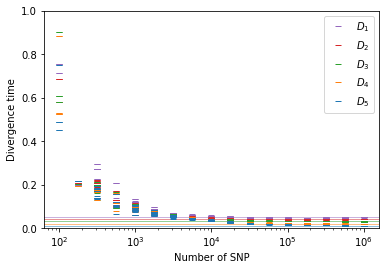

In [4]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.xlabel("Number of SNP")
plt.ylabel("Divergence time")
plt.ylim((0,1))
for index_distance in range(1,6):
    plt.semilogx(distance_all_L_one_K[1:,0],distance_all_L_one_K[1:,index_distance],"_",linewidth = 0.5,label = r'$D_{}$'.format(index_distance),c=colors[5-index_distance])
    plt.axhline(y=(6-index_distance)*0.01,c=colors[5-index_distance],linewidth = 0.5)

plt.legend()
plt.savefig(os.path.join(simulation_subfolder,"splitting_time_6_pop.pdf"))

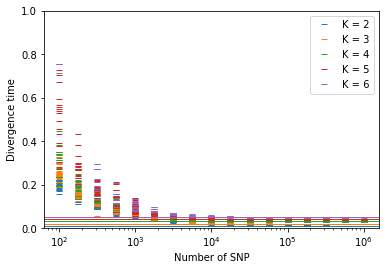

In [5]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.xlabel("Number of SNP")
plt.ylabel("Divergence time")
plt.ylim((0,1))
for index_K, distance_all_L_one_K in enumerate(distance_all_L_all_K):
    plt.semilogx(distance_all_L_one_K[1:,0],distance_all_L_one_K[1:,1],"_",label=f'K = {index_K+2}',linewidth = 1)
    plt.axhline(y=(index_K+1)*0.01,c=colors[index_K],linewidth = 1)
    
plt.legend()
plt.savefig(os.path.join(simulation_subfolder,"largest_splitting_time_n_pop.pdf"))


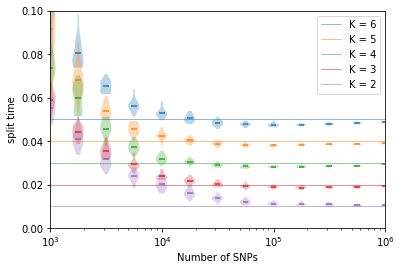

In [8]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.xlabel("Number of SNPs")
plt.ylabel("split time")
plt.ylim((0.0,0.1))
w = 0.1
width = lambda p, w: 10**(np.log10(p)+w/2.)-10**(np.log10(p)-w/2.)
for index_K, distance_all_L_one_K in enumerate(reversed(distance_all_L_all_K)):
    all_nb_of_snps = np.unique(distance_all_L_one_K[:,0])
    all_box = [distance_all_L_one_K[distance_all_L_one_K[:,0]==nb_of_snip,1] for nb_of_snip in all_nb_of_snps]
    plt.violinplot(all_box,positions=all_nb_of_snps, widths=width(all_nb_of_snps,w),showmeans = True,showextrema=False)
    plt.axhline(y=(5-index_K)*0.01,c=colors[index_K],linewidth = 0.5,label = f'K = {6-index_K}')
plt.xscale("log")
plt.xlim((1000,1000000))
plt.legend()
plt.savefig(os.path.join(simulation_subfolder,"largest_splitting_time_n_pop_bis.pdf"))


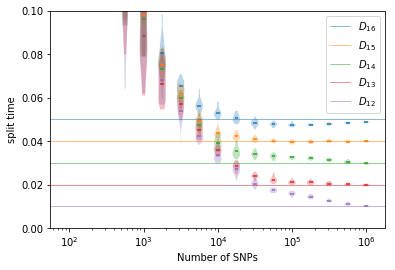

In [40]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
plt.xlabel("Number of SNPs")
plt.ylabel("split time")
plt.ylim((0,0.1))
all_distances_6_pop = distance_all_L_all_K[4]
for index_distance in range(1,6):
    all_nb_of_snps = np.unique(all_distances_6_pop[:,0])
    all_box = [all_distances_6_pop[all_distances_6_pop[:,0]==nb_of_snip,index_distance] for nb_of_snip in all_nb_of_snps]
    plt.violinplot(all_box,positions=all_nb_of_snps, widths=width(all_nb_of_snps,w),showmeans = True,showextrema=False)
    leg = 'D_{' + str(10+7-index_distance) + "}"
    plt.axhline(y=(6-index_distance)*0.01,c=colors[index_distance-1],linewidth = 0.5,label = f'${leg}$')
plt.xscale("log")
plt.legend()
plt.savefig(os.path.join(simulation_subfolder,"splitting_time_6_pop_bis.pdf"))

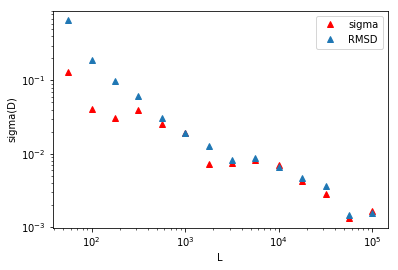

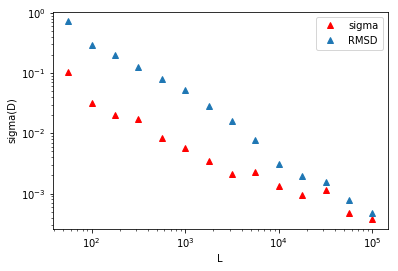

In [14]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma1[1:,0],sigma1[1:,1],"r^",label="sigma")
ax.loglog(sigma1[1:,0],sigma1[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.loglog(sigma2[1:,0],sigma2[1:,1],"r^",label="sigma")
ax.loglog(sigma2[1:,0],sigma2[1:,2],"^",label ="RMSD")
ax.legend()
ax.set_xlabel("L")
ax.set_ylabel("sigma(D)")
plt.savefig("RMSD_D=0.1.pdf")

/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/fmichaud/anaconda3/envs/medeas/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


[1.54580281e-01 2.22388181e-02 1.38625037e-02 1.37478044e-02
 1.36394042e-02 1.35611270e-02 1.35330407e-02 1.34595763e-02
 1.34451394e-02 1.33615516e-02 1.32839077e-02 1.32355829e-02
 1.31589719e-02 1.30901259e-02 1.30702385e-02 1.30270840e-02
 1.29719680e-02 1.29527947e-02 1.29335488e-02 1.28948485e-02
 1.28321975e-02 1.27622562e-02 1.27164716e-02 1.26350723e-02
 1.25505057e-02 1.24688996e-02 1.24090146e-02 1.23956214e-02
 1.23181594e-02 1.23113142e-02 1.22486811e-02 1.22203621e-02
 1.21930971e-02 1.21684058e-02 1.20892989e-02 1.20405642e-02
 1.19739934e-02 1.19490617e-02 1.19134750e-02 1.18448743e-02
 1.17646050e-02 1.17152223e-02 1.16962159e-02 1.16479705e-02
 1.15957723e-02 1.15617876e-02 1.15448530e-02 1.15008007e-02
 1.14450746e-02 1.13407216e-02 1.13022609e-02 1.12393847e-02
 1.11838203e-02 1.11224755e-02 1.10600376e-02 1.10084613e-02
 1.08536465e-02 1.07690939e-02 1.06737041e-02 6.02784256e-17]


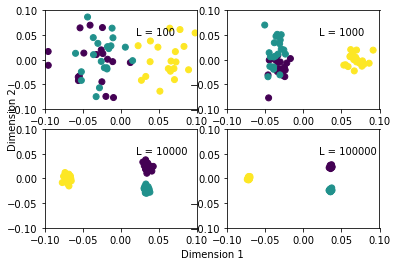

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
for iL, L in enumerate([100,1000,10000,100000]):
    location_vector = os.path.join (simulation_subfolder, f'convergence_speed/L_{L}/MDS_eigensystem/p1.vecs.data')
    val,vec = pickle.load(open(location_vector,"rb"))
    ax = fig.add_subplot(2,2,iL+1)
    scale = 0.1
    ax.set_xlim([-scale,scale])
    ax.set_ylim([-scale,scale])
    ax.text(0.02,scale*0.5,f'L = {L}')
    order = np.argsort(-val)
    ax.scatter(np.sqrt(val[order[0]])*vec[:,order[0]],np.sqrt(val[order[1]])*vec[:,order[1]],c = np.concatenate((np.full(20,1),np.full(20,2),np.full(20,3))))
fig.show()
print(val[order])
fig.savefig(os.path.join(simulation_subfolder,"PCA.pdf"))


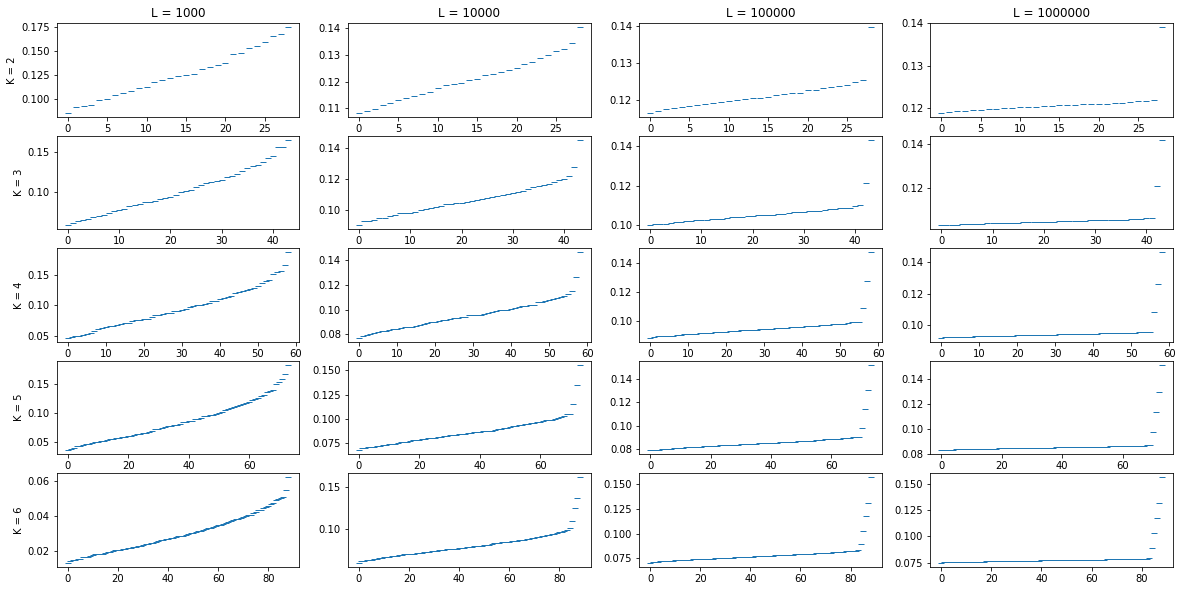

In [60]:
prop_cycle = plt.rcParams['axes.prop_cycle']
Ls = [1000,10000,100000,1000000]
colors = prop_cycle.by_key()['color']
fig = plt.figure(figsize=(20, 10))
Ks = range(2,7)
index = 1
for K in Ks:
    for L in Ls:
        location_vector = os.path.join(simulation_subfolder, f'convergence_speed',f'L_{L}',f'K_{K}',"MDS_eigensystem",'p2.vecs.data')
        val,vec = pickle.load(open(location_vector,"rb"))
        ax = fig.add_subplot(len(Ks),len(Ls),index)
        ax.plot(val[1:],"_")
        index = index+1
        if L == Ls[0]:
            ax.set_ylabel(f'K = {K}')
        if K == Ks[0]:
            ax.set_title(f'L = {L}')
plt.savefig(os.path.join(simulation_subfolder,"eigenvalue_spectrum.pdf"))


In [47]:
list(Ks)

[2, 3, 4, 5]